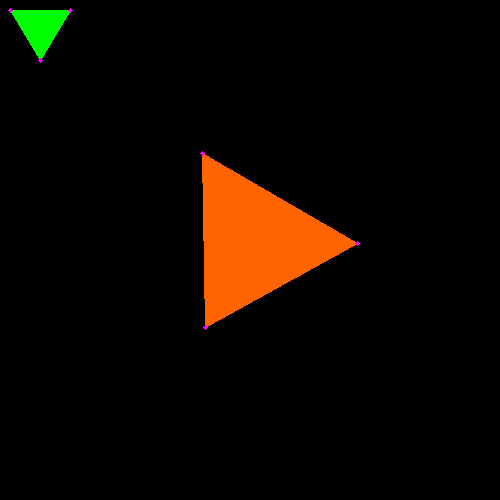

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv


def draw_triangle(im, triangle, color=(0,255,0)):
    # Normalizar coordenadas homogeneas
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

def scale(vertex, sx, sy):
    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

    scaled_vertex = np.dot(vertex, S.T)
    return scaled_vertex


def rotate(vertex, a):
    a = np.deg2rad(a) #Pasa grados a radianes
    R = np.array([
        [np.cos(a), -np.sin(a), 0],
        [np.sin(a), np.cos(a), 0],
        [0, 0, 1]
    ])

    rotated_vertex = np.dot(vertex, R.T)
    return rotated_vertex

def translate(vertex, dx, dy):
    T = np.array([
        [1, 0, dx],
        [0, 1, dy],
        [0, 0, 1]
    ])

    translated_vertex = np.dot(vertex, T.T)
    return translated_vertex # Added return statement

def compuesta(vertex, dx, dy, sx, sy, a):
    M = np.array([[sx,0,dx], [0,sy,dy], [np.cos(a), -np.sin(a), 0], [0,0,1]])
    res =  M @ vertex.T
    return res.T

# image size
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

# Parametros de las transformaciones
# Traslada a centro y realiza escala y rotacion
angle = 30
s = 3
t = 250
# Sistema coordenado de imagenes
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = translate(rotate( scale(translate(triangle1, -40,-30),s,s) ,angle), t,t)

draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color= (0,100,255))

cv2_imshow(im)